<a href="https://colab.research.google.com/github/Potwings/handsOnML/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


In [ ]:
housing.head() #처음 5행 확인

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()  # 데이터 간략 설명 확인(행 수, null이 아닌 값의 개수, 특성의 데이터 타입)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts() # ocean_proximity에 어떤 카테고리가 있고 카테고리 별 개수 조회

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe() # 숫자형 특성의 요약 정보 (count, mean, min, max, 표준 편차, 백순위수)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


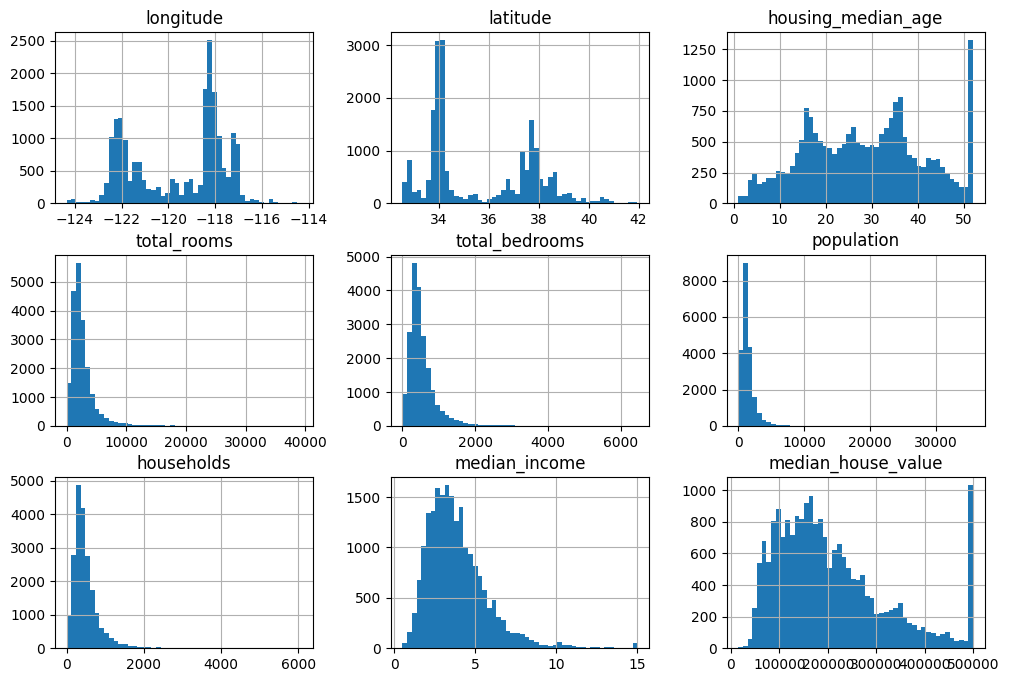

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize= (12,8)) # 히스토그램 생성
plt.show()

In [ ]:
import numpy as np

data = housing.copy()
print(len(data))
shuffled_indices = np.random.permutation(len(data)) # 0 ~ data길이 범위의 수를 무작위로 추출
test_indices = shuffled_indices[:5]

data.iloc[1]

20640


longitude              -122.22
latitude                 37.86
housing_median_age        21.0
total_rooms             7099.0
total_bedrooms          1106.0
population              2401.0
households              1138.0
median_income           8.3014
median_house_value    358500.0
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [ ]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data)) # 0 ~ data길이 범위의 수를 무작위로 추출
  test_set_size = int(len(data) * test_ratio) # 전체 데이터 중 테스트 비율 만큼만 테스트 세트 크기로 지정
  test_indices = shuffled_indices[:test_set_size] # 무작위로 추출한 수에서 테스트 세트 크기 만큼만 추출(테스트 세트 인덱스)
  train_indices = shuffled_indices[test_set_size:] # 무작위로 추출한 수에서 테스트 세트를 제외하고 추출(훈련 세트 인덱스)

  # data에서 test_indices의 인덱스에 포함된 값(훈련 세트), data에서 train_indices 인덱스에 포함된 값(테스트 세트) return
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = shuffle_and_split_data(data, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [ ]:
from zlib import crc32

def is_id_in_test_set(id, test_ratio):
  return crc32(np.int64(id)) < test_ratio * 2**32 # id의 해시값이 rest_ratio보다 작을 경우 True, 그외 False 반환

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column] # data에서 id_column에 해당하는 값들 추출
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio)) # is_id_in_test_set 함수의 boolean을 in_test_set에 담아준다.
  return data.loc[~in_test_set], data.loc[in_test_set] # in_test_set의 false인 인덱스에 해당하는 data값, in_test_set의 true인 인덱스에 해당하는 data값 반환

In [ ]:
housing_with_id = housing.reset_index() # index 열이 추가된 데이터프레임 반환

train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'index') # index column을 기준으로 data 훈련 세트와 테스트 세트로 분리
display(train_set)
display(test_set)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] # 위도와 경도는 고유한 특성이므로 이를 활용하여 식별자 생성
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")
display(train_set)
display(test_set)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


In [ ]:
from sklearn.model_selection import train_test_split

# 위의 shuffle_and_split_data과 유사하나 초깃값 지정 & 여러개의 데이터 세트에 대한 동일한 처리가 가능하다.
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
display(train_set)
display(test_set)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


In [ ]:
# median_income을 기준으로 [0 ~ 1.5, 1.5 ~ 3.0, 3.0 ~ 4.5, 4.5 ~ 6, 6 ~ ]으로 계층을 총 5개로 나눈다
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

In [ ]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

    # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')
    # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


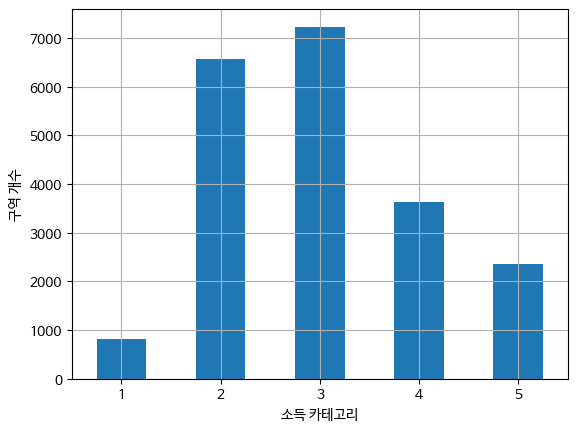

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# 10개의 계층으로 분할
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(housing, housing["income_cat"]): #housing을 income_cat값 기준으로 분할
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = strat_splits[3] #?? 왜 인덱스가 변해도 값이 동일하지?
strat_test_set["income_cat"].value_counts() / len(strat_test_set) # 각 카테고리별 데이터 비율

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.select_dtypes(include=[np.number]) # 수치형 특성 남기고 제거

In [ ]:
imputer.fit(housing_num) # 중간값 계산
imputer.statistics_ # 저장된 중간값 확인

array([-118.51  ,   34.26  ,   29.    , 2131.    ,  435.    , 1168.    ,
        410.    ,    3.5385])

In [ ]:
X = imputer.transform(housing_num) # 중간값으로 Nan값 대체 (numpy 배열로 반환)

In [ ]:
display(housing_num[housing_num['total_bedrooms'].isnull()])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14883,-118.17,34.06,43.0,464.0,NaN,416.0,120.0,2.4750
1271,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000
2673,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672
9531,-119.44,36.58,37.0,1054.0,NaN,879.0,257.0,2.5234
6563,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254
...,...,...,...,...,...,...,...,...
19828,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036
16273,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108
13498,-118.25,33.94,43.0,793.0,NaN,736.0,231.0,0.8527
19405,-121.89,37.44,8.0,2534.0,NaN,1527.0,364.0,7.8532


In [ ]:
# numpy 배열인 X를 데이터프레임으로 변환
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
display(housing_tr.loc[14452])

longitude             -120.6700
latitude                40.5000
housing_median_age      15.0000
total_rooms           5343.0000
total_bedrooms         435.0000
population            2503.0000
households             902.0000
median_income            3.5962
Name: 14452, dtype: float64

### 2.5.2 텍스트와 범주형 특성 다루기

In [ ]:
housing_cat = housing[["ocean_proximity"]]

In [ ]:
housing_cat.head(8) # 상위 8개 행 반환

,ocean_proximity
20581,INLAND
1857,INLAND
9942,INLAND
4341,<1H OCEAN
18004,NEAR BAY
4318,INLAND
6264,<1H OCEAN
18674,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) #housing_cat의 텍스트(카테고리) 값들을 숫자로 변환

display(housing_cat.head(10))
display(housing_cat_encoded[:10])

,ocean_proximity
20581,INLAND
1857,INLAND
9942,INLAND
4341,<1H OCEAN
18004,NEAR BAY
4318,INLAND
6264,<1H OCEAN
18674,<1H OCEAN
564,<1H OCEAN
6105,NEAR BAY


array([[1.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.]])

In [ ]:
ordinal_encoder.categories_ # 카테고리 리스트 반환

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # 원-핫 인코딩으로 변환(가능한 값의 개수만큼 배열의 크기 지정)

In [ ]:
display(housing_cat_1hot.__class__)
display()
display(housing_cat_1hot.toarray()[:10])

scipy.sparse._csr.csr_matrix

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
housing_cat.__class__

pandas.core.frame.DataFrame

In [ ]:
test_cat = housing_cat
display(test_cat)

,ocean_proximity
20581,INLAND
1857,INLAND
9942,INLAND
4341,<1H OCEAN
18004,NEAR BAY
...,...
8165,NEAR BAY
5729,<1H OCEAN
1532,NEAR BAY
1406,<1H OCEAN


In [ ]:
# ocean_proximity 에 testset값을 가지고 있는 행 생성

housing_cat.loc[len(housing_cat)] = ["testset"]

<ipython-input-59-6f70d8f89a4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_cat.loc[len(housing_cat)] = ["testset"]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # 원-핫 인코딩으로 변환
display(housing_cat_1hot.toarray())

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [ ]:
housing_cat = housing_cat.drop(housing_cat[housing_cat["ocean_proximity"] == "testset"].index) # ocean_proximity 에 testset값을 가지고 있는 행 제거

In [ ]:
housing_cat[housing_cat["ocean_proximity"] == "testset"] # ocean_proximity 에 testset값을 가지고 있는 행 제거 확인

,ocean_proximity


In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
        'testset'], dtype=object)]

In [ ]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # 원-핫 인코딩으로 변환

In [ ]:
df_test = pd.DataFrame({"ocean_proximity":["<2H OCEAN", "ISLAND"]}) # 현재 DataFrame에 있는 데이터 기준으로만 진
pd.get_dummies(df_test)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown) # 알 수 없는 카테고리도 정상 처리

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown) # 알 수 없는 카테고리는 모두 0으로 무시

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(), # cat_encoder에서 컬럼값 불러옴
                         index=df_test_unknown.index)

In [ ]:
display(df_output)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


### 특성 스케일과 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1)) # -1 ~ 1을 범위로 갖는 정규화 진행
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() # 표준화 진행
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1) # housing_median_age와 35 사이의 유사도 측정하는 가우스 RBF 특성 생성

In [ ]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
display(housing_labels.to_frame())
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())  # label값 표준화
display(scaled_labels)
model = LinearRegression() # 선형 회귀 모델
model.fit(housing[["median_income"]], scaled_labels) # 표준화 한 값으로 모델 훈련
some_new_data = housing[["median_income"]].iloc[:5] # housing[["median_income"]]의 위에서 5개의 데이터 (테스트용)
scaled_predictions = model.predict(some_new_data) # income에 대한 생성한 모델의 예측값
display(scaled_predictions)
predictions = target_scaler.inverse_transform(scaled_predictions) # 예측값을 원본(표준화 전) 스케일로 되돌린다.
display(predictions)

,median_house_value
20581,123400.0
1857,104600.0
9942,74800.0
4341,156600.0
18004,88800.0
...,...
8165,273000.0
5729,185600.0
1532,489600.0
1406,136100.0


array([[-0.72605595],
       [-0.88971572],
       [-1.14913386],
       ...,
       [ 2.46182746],
       [-0.61549855],
       [ 1.20391061]])

array([[-0.25914521],
       [ 0.12534385],
       [-0.73288036],
       [-0.63214999],
       [-0.43083325]])

array([[177035.18380513],
       [221202.38629554],
       [122616.06230969],
       [134187.20768124],
       [157312.95640094]])

In [ ]:
# TransformedTargetRegressor을 활용하여 진행
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler()) # 선형회귀 모델에 표준화로 스케일링한 데이터로 훈련
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data) # 원본 스케일로 예측값 반환
display(predictions)


array([177035.18380513, 221202.38629554, 122616.06230969, 134187.20768124,
       157312.95640094])

In [ ]:
from sklearn.preprocessing import FunctionTransformer

sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [ ]:
display(sf_simil)

array([[0.89107774],
       [0.17065608],
       [0.45523177],
       ...,
       [0.99672119],
       [0.04482054],
       [0.99343425]])

In [ ]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

In [ ]:
def showName(**kargs):
  if 'age' in kargs.keys():
    print("name: " + kargs.get('name') + ", age: " + kargs.get('age'))
  else:
    print("name: " + kargs.get('name'))

showName(name="paka", age="99")
showName(name="akaps")

name: paka, age: 99
name: akaps


In [ ]:
import numpy as np

testArr = np.array([[1.,2.],[3.,4.]])
display(testArr.shape[0])

2

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, withmin=True):
    self.with_mean = with_mean

  def fit(self, X, y=None):
    X = check_array(X)
    self.mean_ = X.mean(axis=0)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    return self
  def transform(self, X):
    check_is_fitted(self)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X = X - self.mean_
    return X / self.scale_

In [88]:
def test(name="deafult"):
  print(name)

test()
test("akaps")

deafult
akaps


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


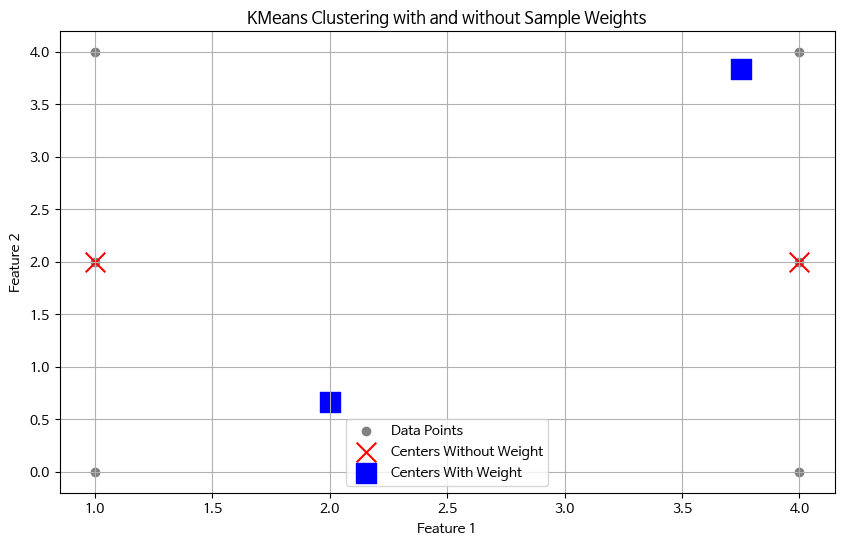

In [92]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 예시 데이터 생성
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# 각 데이터 포인트에 대한 가중치
weights = np.array([1, 1, 1, 1, 10, 1])

# 가중치를 사용하지 않은 KMeans
kmeans_no_weight = KMeans(n_clusters=2, random_state=0).fit(X)
centers_no_weight = kmeans_no_weight.cluster_centers_

# 가중치를 사용한 KMeans
kmeans_with_weight = KMeans(n_clusters=2, random_state=0).fit(X, sample_weight=weights)
centers_with_weight = kmeans_with_weight.cluster_centers_

# 결과 시각화
plt.figure(figsize=(10, 6))

# 데이터 포인트 시각화
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data Points')

# 가중치 없이 클러스터링 결과
plt.scatter(centers_no_weight[:, 0], centers_no_weight[:, 1], c='red', marker='x', s=200, label='Centers Without Weight')

# 가중치와 함께 클러스터링 결과
plt.scatter(centers_with_weight[:, 0], centers_with_weight[:, 1], c='blue', marker='s', s=200, label='Centers With Weight')

# 제목과 범례 추가
plt.title('KMeans Clustering with and without Sample Weights')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# 그래프 출력
plt.show()


In [111]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters # 클러스터의 개수
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    # Kmeans(최상의 결과를 찾기 위한 알고리즘 반복 횟수 지정) 클래스를 활용하여 데이터 변환
    self.kmeans_ = KMeans(self.n_clusters,  n_init=10, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    # 가우스 RBF 특성 생성
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

In [121]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)
similarities[:3].round(2) # 결과의 상위 3개를 소수 둘째 자리에서 반올림하여 표현

array([[0.  , 0.4 , 0.  , 0.  , 0.09, 0.  , 0.29, 0.08, 0.  , 0.  ],
       [0.11, 0.  , 0.  , 0.11, 0.  , 0.37, 0.  , 0.  , 0.07, 0.02],
       [0.  , 0.  , 0.  , 0.  , 0.73, 0.  , 0.  , 0.  , 0.  , 0.  ]])